In [101]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime
import string

os.chdir("C:\\Users\\Lenovo\\Desktop\\Warsztaty z ML\\Projekt\\Dane")



In [33]:
#tworzy z timestampa czas w sekundach od benchmark date
benchmark_date = pd.to_datetime("2016-01-01 00:00:00",format="%Y-%m-%d %H:%M:%S")
def clean_timestamp(x,benchmark_date):
	y=x.replace("T"," ")
	y=y.replace("+00:00","")
	y=pd.to_datetime(y,format="%Y-%m-%d %H:%M:%S")
	y=(y-benchmark_date).total_seconds()
	return y

In [34]:
failures = pd.read_csv("wind-farm-1-failures-training.csv",sep=";")
failures["time"]=failures.Timestamp.apply(lambda x:clean_timestamp(x,benchmark_date))
failures["period"]=failures.time.apply(lambda x:int(np.floor(x/600)))

In [35]:
metmast = pd.read_csv("wind-farm-1-metmast-training.csv",sep=";")
metmast["time"] = metmast.Timestamp.apply(lambda x:clean_timestamp(x,benchmark_date))
metmast["period"] = metmast.time.apply(lambda x:int(np.floor(x/600)))

In [36]:
signals = pd.read_csv("wind-farm-1-signals-training.csv",sep=";")
signals["time"] = signals.Timestamp.apply(lambda x:clean_timestamp(x,benchmark_date))
signals["period"] = signals.time.apply(lambda x:int(np.floor(x/600)))

In [37]:
signals_T11=signals.loc[signals.Turbine_ID=="T11"].reset_index(drop=True)

signals_T06=signals.loc[signals.Turbine_ID=="T06"].reset_index(drop=True)

signals_T07=signals.loc[signals.Turbine_ID=="T07"].reset_index(drop=True)

signals_T01=signals.loc[signals.Turbine_ID=="T01"].reset_index(drop=True)

signals_T09=signals.loc[signals.Turbine_ID=="T09"].reset_index(drop=True)

In [38]:
#funkcja do powr_curve tak jakbyśmy ją rysowali łącząc punkty
pc = pd.read_csv("Power_curve.csv")
def power_curve(x):
	if x<pc.iloc[0,0]:return 0
	elif x>pc.iloc[len(pc)-1,0]:return pc.iloc[len(pc)-1,1]
	else:
		for i in range(1,len(pc)):
			if x<pc.iloc[i,0]:return (pc.iloc[i-1,1]*(pc.iloc[i,0]-x)/(pc.iloc[i,0]-pc.iloc[i-1,0]) + 
                                      pc.iloc[i,1]*(x-pc.iloc[i-1,0])/(pc.iloc[i,0]-pc.iloc[i-1,0]))


In [39]:
merged=signals.merge(metmast,on=["period"])

In [40]:
merged["angle_difference"]=(merged["Nac_Direction_Avg"]-merged["Avg_Winddirection2"])%360
merged["angle"]=pd.DataFrame({"a":abs(180-merged["angle_difference"]),
              "b":(-merged["angle_difference"])%360,
              "c":merged["angle_difference"]}).apply(np.min,1)

In [41]:
merged["cos"]=np.cos(np.pi*merged["angle"]/180)

In [42]:
merged["sin"]=np.sin(np.pi*merged["angle"]/180)

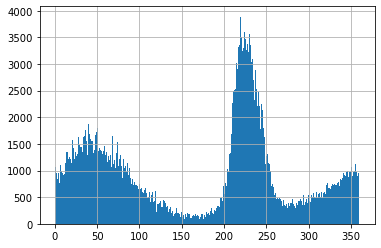

In [43]:
merged["angle_difference"].hist(bins=360)

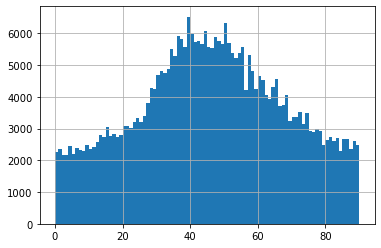

In [44]:
merged["angle"].hist(bins=90)

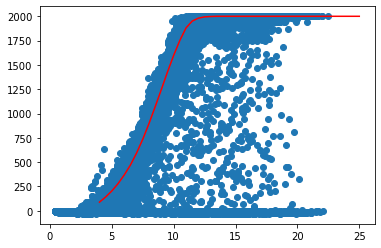

In [45]:
plt.scatter(x=merged["Amb_WindSpeed_Avg"],y=merged["Grd_Prod_Pwr_Avg"])
plt.plot(pc.iloc[:,0],pc.iloc[:,1],c='red')
plt.show()

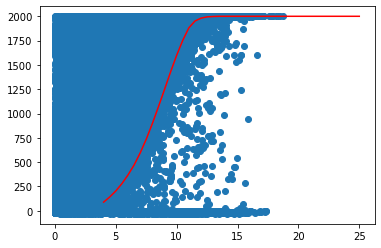

In [46]:
plt.scatter(x=merged["cos"]*merged["Amb_WindSpeed_Avg"],y=merged["Grd_Prod_Pwr_Avg"])
plt.plot(pc.iloc[:,0],pc.iloc[:,1],c='red')
plt.show()

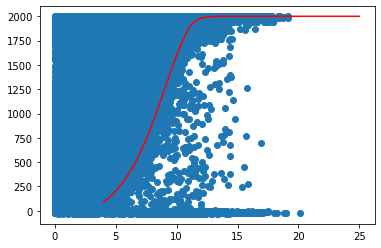

In [47]:
plt.scatter(x=merged["sin"]*merged["Amb_WindSpeed_Avg"],y=merged["Grd_Prod_Pwr_Avg"])
plt.plot(pc.iloc[:,0],pc.iloc[:,1],c='red')
plt.show()

In [48]:
merged=merged.merge(failures[["Turbine_ID","period","time"]],how="left",on=["Turbine_ID","period"])

In [52]:
merged_T11=merged.loc[merged.Turbine_ID=="T11"].reset_index(drop=True)

merged_T06=merged.loc[merged.Turbine_ID=="T06"].reset_index(drop=True)

merged_T07=merged.loc[merged.Turbine_ID=="T07"].reset_index(drop=True)

merged_T01=merged.loc[merged.Turbine_ID=="T01"].reset_index(drop=True)

merged_T09=merged.loc[merged.Turbine_ID=="T09"].reset_index(drop=True)

In [54]:
czas=-1
for i in range(len(merged_T11["time"])):
    if not np.isnan(merged_T11.loc[len(merged_T11["time"])-i-1,"time"]):
        czas=merged_T11.loc[len(merged_T11["time"])-i-1,"time"]
    merged_T11.loc[len(merged_T11["time"])-i-1,"time"]=czas

In [55]:
czas=-1
for i in range(len(merged_T06["time"])):
    if not np.isnan(merged_T06.loc[len(merged_T06["time"])-i-1,"time"]):
        czas=merged_T06.loc[len(merged_T06["time"])-i-1,"time"]
    merged_T06.loc[len(merged_T06["time"])-i-1,"time"]=czas

In [56]:
czas=-1
for i in range(len(merged_T07["time"])):
    if not np.isnan(merged_T07.loc[len(merged_T07["time"])-i-1,"time"]):
        czas=merged_T07.loc[len(merged_T07["time"])-i-1,"time"]
    merged_T07.loc[len(merged_T07["time"])-i-1,"time"]=czas

In [57]:
czas=-1
for i in range(len(merged_T01["time"])):
    if not np.isnan(merged_T01.loc[len(merged_T01["time"])-i-1,"time"]):
        czas=merged_T01.loc[len(merged_T01["time"])-i-1,"time"]
    merged_T01.loc[len(merged_T01["time"])-i-1,"time"]=czas

In [58]:
czas=-1
for i in range(len(merged_T09["time"])):
    if not np.isnan(merged_T09.loc[len(merged_T09["time"])-i-1,"time"]):
        czas=merged_T09.loc[len(merged_T09["time"])-i-1,"time"]
    merged_T09.loc[len(merged_T09["time"])-i-1,"time"]=czas

In [59]:
df = pd.concat([merged_T11,merged_T06,merged_T07,merged_T01,merged_T09]).reset_index(drop=True)

In [63]:
df["time_to_failure"]=df["time"]-df["time_x"]
df=df.loc[df["time_to_failure"]>0,:].reset_index(drop=True)

In [66]:
df["time_to_failure"]=df["time_to_failure"]/600

In [68]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283485 entries, 0 to 283484
Data columns (total 133 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Turbine_ID                   283485 non-null  object 
 1   Timestamp_x                  283485 non-null  object 
 2   Gen_RPM_Max                  283485 non-null  float64
 3   Gen_RPM_Min                  283485 non-null  float64
 4   Gen_RPM_Avg                  283485 non-null  float64
 5   Gen_RPM_Std                  283485 non-null  float64
 6   Gen_Bear_Temp_Avg            283483 non-null  float64
 7   Gen_Phase1_Temp_Avg          283485 non-null  int64  
 8   Gen_Phase2_Temp_Avg          283485 non-null  int64  
 9   Gen_Phase3_Temp_Avg          283485 non-null  int64  
 10  Hyd_Oil_Temp_Avg             283485 non-null  int64  
 11  Gear_Oil_Temp_Avg            283485 non-null  int64  
 12  Gear_Bear_Temp_Avg           283485 non-null  int64  
 13

In [88]:
df=df.dropna()

In [131]:
df=df.loc[df["Grd_Prod_Pwr_Avg"]>0,].reset_index(drop=True)

In [132]:
Y=df["time_to_failure"]

In [133]:
X=df.drop(columns=["Turbine_ID","Timestamp_x","time_x","period","Timestamp_y","time_y","time","time_to_failure"])

In [134]:
from sklearn import preprocessing

In [135]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [136]:
from sklearn.decomposition import PCA

In [137]:
pca = PCA(n_components=125)
pca.fit(X)

PCA(n_components=125)

In [138]:
print(pca.explained_variance_ratio_)

[9.97658257e-01 2.30962163e-03 1.13180028e-05 8.02464500e-06
 4.99668704e-06 1.53815726e-06 1.32680752e-06 9.88501744e-07
 8.82231674e-07 7.11665029e-07 4.38018859e-07 4.11335282e-07
 2.47864936e-07 1.77868358e-07 1.62563959e-07 1.57774916e-07
 1.45908744e-07 1.16908321e-07 9.78313896e-08 4.71333914e-08
 4.14866000e-08 3.74541220e-08 3.02244370e-08 2.74024197e-08
 2.32462341e-08 2.23244689e-08 2.06147435e-08 2.03572423e-08
 1.81739562e-08 1.50813892e-08 1.43887666e-08 8.20816071e-09
 7.86210736e-09 7.78987986e-09 5.34154400e-09 5.14486818e-09
 4.20429692e-09 3.11398813e-09 2.94615075e-09 2.41591725e-09
 2.06471015e-09 1.73078011e-09 1.39919333e-09 1.17386303e-09
 9.32904882e-10 8.06111079e-10 6.52202615e-10 6.27884910e-10
 5.07002928e-10 4.76085736e-10 4.15862900e-10 3.25397004e-10
 2.47036010e-10 2.43989874e-10 2.09980916e-10 1.82450864e-10
 1.39365660e-10 1.33840985e-10 1.13280540e-10 1.00199511e-10
 8.85197113e-11 8.05826887e-11 7.25778034e-11 6.52081537e-11
 6.31650457e-11 4.944248

In [139]:
print(pca.singular_values_)

[7.06780387e+07 3.40066622e+06 2.38055647e+05 2.00450204e+05
 1.58173842e+05 8.77594634e+04 8.15074959e+04 7.03529493e+04
 6.64637608e+04 5.96940990e+04 4.68317076e+04 4.53828296e+04
 3.52290665e+04 2.98430315e+04 2.85302595e+04 2.81068753e+04
 2.70292657e+04 2.41944804e+04 2.21326135e+04 1.53623598e+04
 1.44127718e+04 1.36944123e+04 1.23019143e+04 1.17135368e+04
 1.07887193e+04 1.05726573e+04 1.01597391e+04 1.00960865e+04
 9.53933998e+03 8.68988967e+03 8.48800002e+03 6.41086327e+03
 6.27426812e+03 6.24538145e+03 5.17162462e+03 5.07552200e+03
 4.58817822e+03 3.94868114e+03 3.84079450e+03 3.47804035e+03
 3.21531210e+03 2.94384227e+03 2.64686903e+03 2.42438898e+03
 2.16128616e+03 2.00905133e+03 1.80711111e+03 1.77310156e+03
 1.59330465e+03 1.54396046e+03 1.44300780e+03 1.27643988e+03
 1.11217652e+03 1.10529827e+03 1.02537683e+03 9.55798953e+02
 8.35355770e+02 8.18630934e+02 7.53132248e+02 7.08314921e+02
 6.65753692e+02 6.35205816e+02 6.02830891e+02 5.71405664e+02
 5.62382757e+02 4.975580

In [146]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [141]:
kmeans.labels_

array([10,  2,  2, ...,  4, 12, 12])

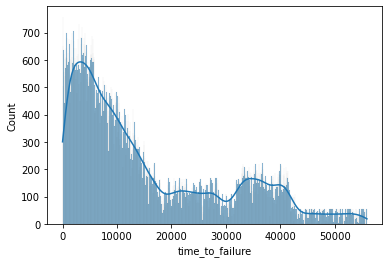

In [157]:
sns.histplot(Y,bins=1000,kde=True)

In [147]:
for i in range(10):
    Y_i=Y[kmeans.labels_==i]
    print(len(Y_i))

32152
11575
12088
18680
10800
34277
14613
24416
10575
25295


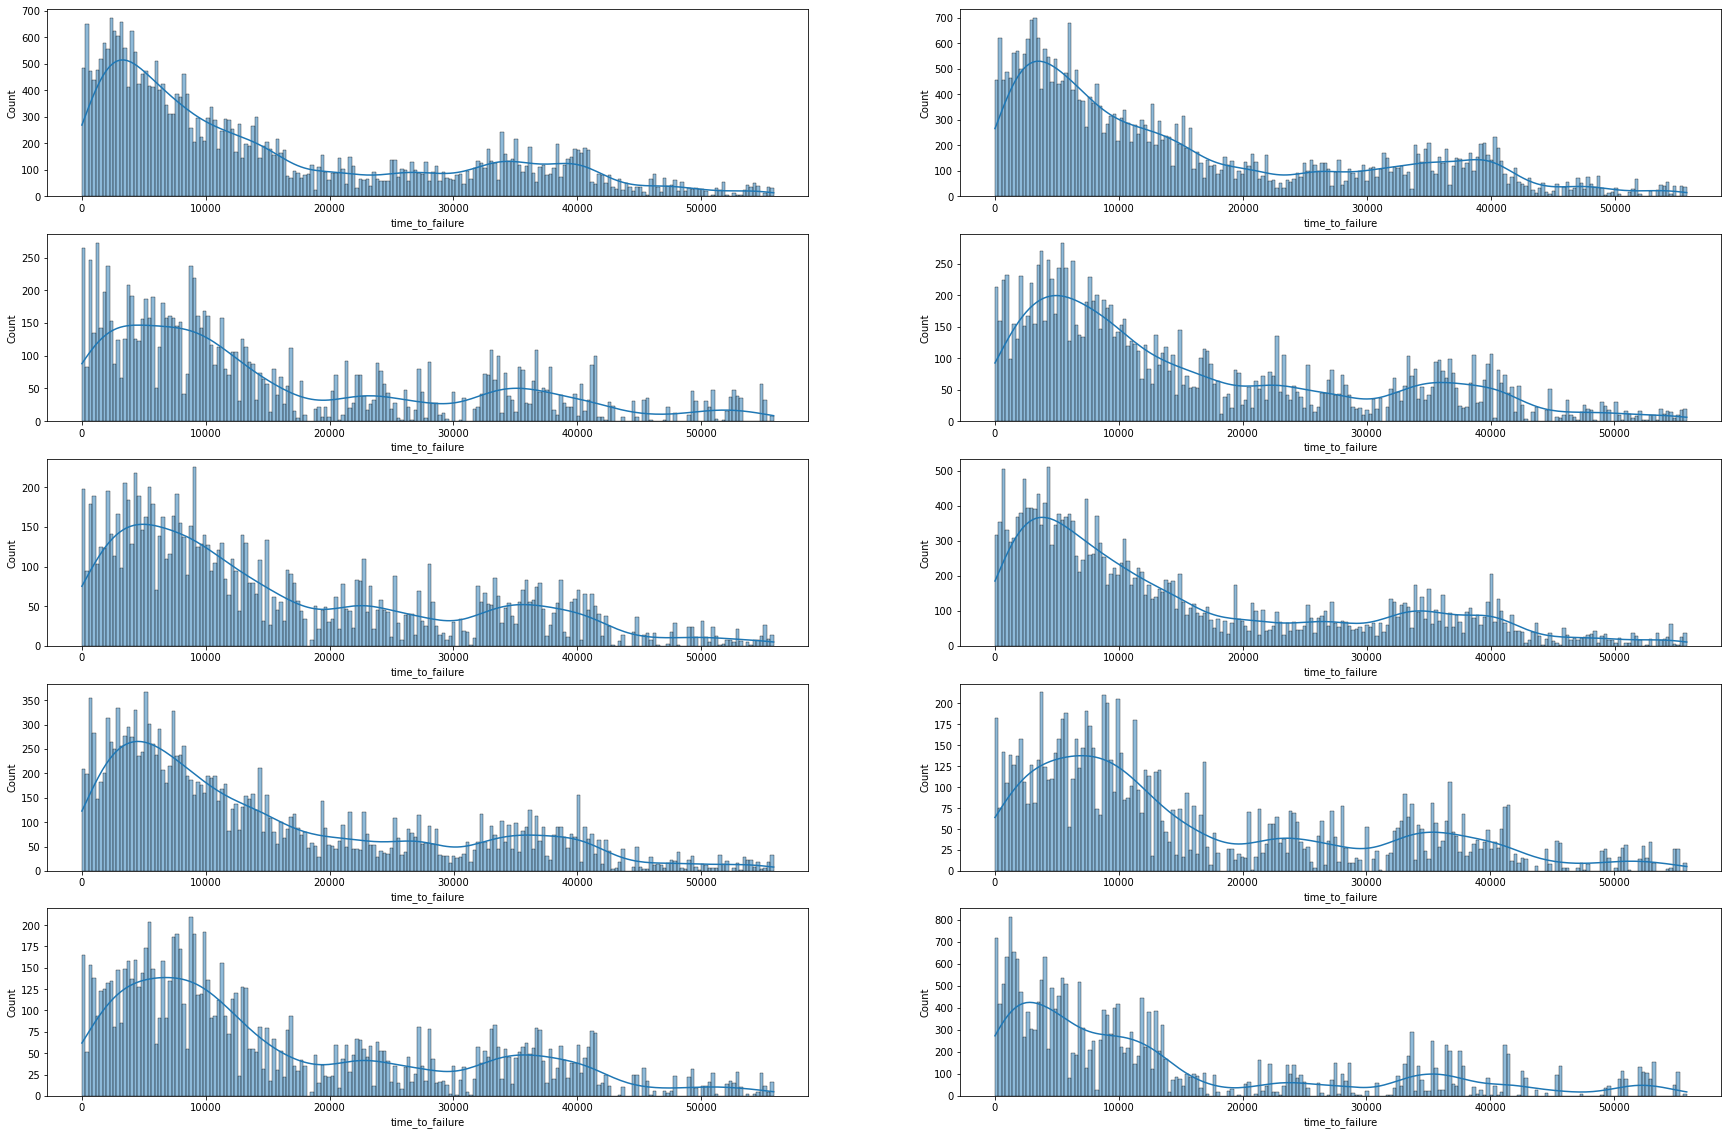

In [158]:
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(30,20))
for i in range(5):
    for j in range(2):
        Y_ij=Y[kmeans.labels_==i+j*5]
        sns.histplot(Y_ij,bins=200,ax=axes[i,j],kde=True)
plt.show()

In [ ]:
def my_density(x,miu,sig,pi,alfa,beta):
    